<a href="https://colab.research.google.com/github/iamVaibhav100/kaggle/blob/main/Titanic_survivors_predictions/titanic_survivors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Titanic disaster survivors predictions
Project for the kaggle competition:
[Titanic - Machine Learning from disaster](https://www.kaggle.com/competitions/titanic)

Aim: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

### Data
The data has been split into two groups:

* training set (train.csv)
* test set (test.csv)

Training data has 891 values with 12 features like passenger-id, name, sex, age, etc.
Test data has 418 values with 11 features missing one survived column to test the model on submission.

Since the data provided is labelled so supervised classification technique is used to solve the problem.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
ids = df_test["PassengerId"]
ids

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [6]:
df_train.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [10]:
df_train['Embarked_S'] = df_train['Embarked'].apply(lambda x: 1 if x == 'S' else 0)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [12]:
sum(df_train["Survived"].isnull())

0

In [13]:
sum(df_train["Age"].isnull())

177

In [14]:
df_train['Age'] = df_train['Age'].fillna(df_train.groupby(['Pclass', 'Sex'])['Age'].transform('mean'))

In [15]:
df_train['Sex'] = df_train['Sex'].apply(lambda x: 1 if x == 'male' else 0)

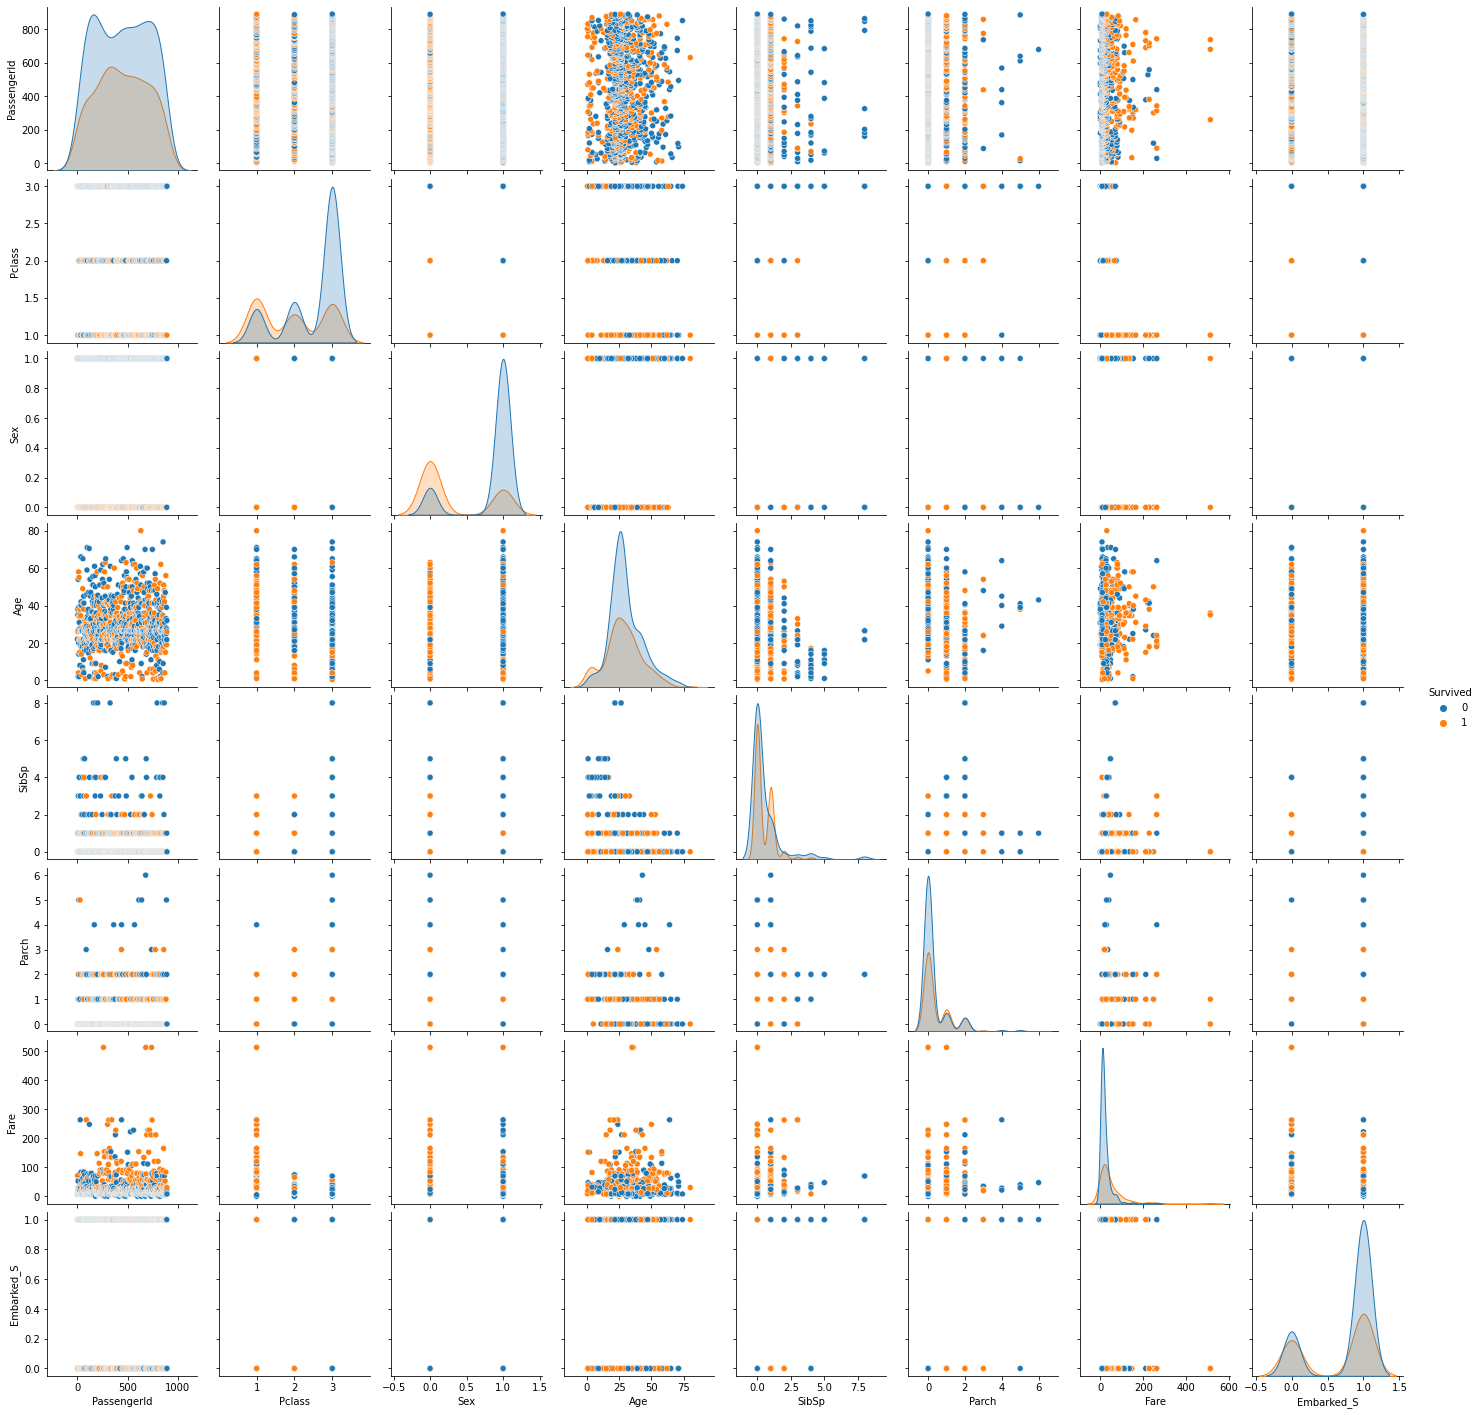

In [16]:
sns.pairplot(hue='Survived',data=df_train)
plt.show()

In [17]:
df_features = df_train.drop(['PassengerId', 'Survived', 'Name', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_target = df_train['Survived']
features_train, features_valid, target_train, target_valid = train_test_split(df_features, df_target, test_size=0.25, random_state=809)
features_train

,Pclass,Sex,Age,SibSp,Fare,Embarked_S
491,3,1,21.000000,0,7.2500,1
364,3,1,26.507589,1,15.5000,0
852,3,0,9.000000,1,15.2458,0
769,3,1,32.000000,0,8.3625,1
809,1,0,33.000000,1,53.1000,1
...,...,...,...,...,...,...
75,3,1,25.000000,0,7.6500,1
384,3,1,26.507589,0,7.8958,1
609,1,0,40.000000,0,153.4625,1
327,2,0,36.000000,0,13.0000,1


### Decision Tree

In [18]:
model = DecisionTreeClassifier(random_state=809)
model.fit(features_train, target_train)
model.score(features_valid, target_valid)

0.7533632286995515

### Logistic Regression

In [19]:
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=809)
model.fit(features_train, target_train)
model.score(features_valid, target_valid)

0.7757847533632287

### Random forest

In [23]:
best_n = 0
best_acc = 0
for n in [1, 10, 50, 100, 500, 1000]:
    model = RandomForestClassifier(random_state=809, n_estimators=n)
    model.fit(features_train, target_train)
    acc = model.score(features_valid, target_valid)
    if acc > best_acc:
        best_n = n
        best_acc = acc
best_n, best_acc

(50, 0.8071748878923767)

In [22]:
model = RandomForestClassifier(random_state=809, n_estimators=best_n)
model.fit(features_train, target_train)

RandomForestClassifier(n_estimators=50, random_state=809)

In [24]:
model.score(features_train, target_train), model.score(features_valid, target_valid)

(0.9805389221556886, 0.8026905829596412)

### Final prediction on Test data

In [26]:
df_test['Embarked_S'] = df_test['Embarked'].apply(lambda x: 1 if x == 'S' else 0)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [27]:
df_test['Age'] = df_test['Age'].fillna(df_test.groupby(['Pclass', 'Sex'])['Age'].transform('mean'))
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [28]:
df_test['Sex'] = df_test['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [29]:
sum(df_test["Fare"].isnull())

1

In [30]:
df_test['Fare'] = df_test['Fare'].fillna(df_test.groupby('Pclass')['Fare'].transform('mean'))

In [31]:
df_test = df_test.drop(['PassengerId', 'Name', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_test.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked_S
0,3,1,34.5,0,7.8292,0
1,3,0,47.0,1,7.0000,1
2,2,1,62.0,0,9.6875,0
3,3,1,27.0,0,8.6625,1
4,3,0,22.0,1,12.2875,1


In [32]:
predictions = model.predict(df_test)
predictions[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [33]:
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [34]:
#output.to_csv('data/submission.csv', index=False)